In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
assets = ['PG','^GSPC']
pf_data = pd.DataFrame()

for t in assets:
    pf_data[t] = wb.DataReader(t, data_source='yahoo', start='2010-1-1')['Adj Close']

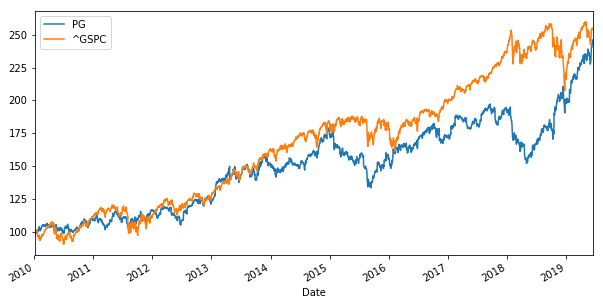

In [3]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10,5))

In [4]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [5]:
log_returns.mean() * 252

PG       0.095458
^GSPC    0.099162
dtype: float64

In [6]:
log_returns.cov() * 252

,PG,^GSPC
PG,0.021449,0.011564
^GSPC,0.011564,0.022282


In [7]:
log_returns.corr() * 252

,PG,^GSPC
PG,252.000000,133.294748
^GSPC,133.294748,252.000000


In [9]:
num_assets = len(assets)
arr = np.random.random(2)
arr[0] + arr[1]

0.7317177315469132

In [11]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights[0] + weights[1]

1.0

**Expected Portfolio Return:**

In [16]:
np.sum(weights * log_returns.mean()) * 252

0.09695676918801645

**Expected Portfolio Variance:**

In [13]:
np.dot(weights.T, np.dot(log_returns.cov() * 252, weights))

0.0168225364537437

**Expected Portfolio Volatility:**

In [14]:
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 252, weights)))

0.12970172109013706

## Trying 1000 diff prob. of portfolio returns w/ volatility based on weight changes

In [19]:
pfolio_returns = []
pfolio_volatilities = []

for x in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 252)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 252, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)
    
pfolio_returns,pfolio_volatilities

(array([0.09704067, 0.09710073, 0.09848621, 0.09766445, 0.09899457,
        0.09711788, 0.09832967, 0.09702763, 0.09731192, 0.09879243,
        0.09659867, 0.09740011, 0.09691235, 0.09772058, 0.09768216,
        0.09559256, 0.09845022, 0.09740566, 0.09866212, 0.09872384,
        0.09753962, 0.0973145 , 0.09902421, 0.09680825, 0.09604814,
        0.09643687, 0.09792346, 0.09814471, 0.09730532, 0.09667103,
        0.09740404, 0.09552383, 0.09759751, 0.09692244, 0.09804751,
        0.09724379, 0.09788224, 0.09713841, 0.09699169, 0.09818227,
        0.09731327, 0.09620729, 0.09795146, 0.09828527, 0.09780251,
        0.09739902, 0.09799459, 0.09728341, 0.09726966, 0.09683769,
        0.09611433, 0.09846649, 0.09737386, 0.0955476 , 0.09664534,
        0.09915336, 0.09855451, 0.09545833, 0.09722323, 0.09824525,
        0.09727205, 0.09785733, 0.09900689, 0.09773531, 0.09802566,
        0.09911648, 0.0956162 , 0.09857295, 0.09828552, 0.09572361,
        0.09628087, 0.09816893, 0.09582491, 0.09

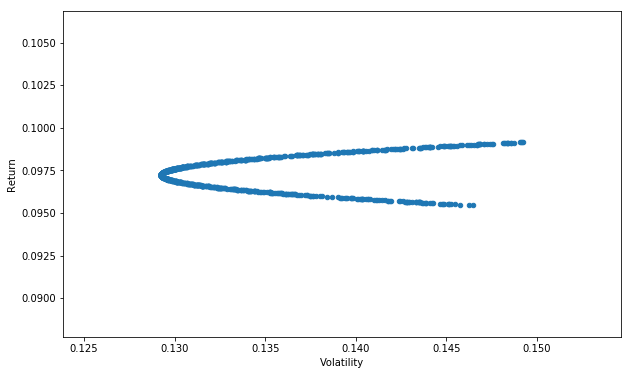

In [24]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10,6))